<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
imdb = tf.keras.datasets.imdb

In [3]:
(x_train, Y_train), (x_test, Y_test) = imdb.load_data(num_words=1000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print(x_train[4])
print(Y_train[4])

[1, 249, 2, 7, 61, 113, 10, 10, 13, 2, 14, 20, 56, 33, 2, 18, 457, 88, 13, 2, 2, 45, 2, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 2, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2, 5, 13, 16, 131, 2, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 2, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 2, 52, 725, 2, 61, 419, 11, 13, 2, 15, 2, 20, 11, 4, 2, 5, 296, 12, 2, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2, 2, 7, 2, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 2, 18, 165, 170, 143, 19, 14, 5, 2, 6, 226, 251, 7, 61, 113]
0


In [5]:
vocabulary = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
print(list(vocabulary)[:10])

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling']


In [7]:
max_size = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_size)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_size)

In [8]:
embedding_size = 32
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(1000, embedding_size, input_length=(max_size)))
model.add(tf.keras.layers.GRU(100, return_sequences='true'))
model.add(tf.keras.layers.GRU(50, return_sequences='true'))
model.add(tf.keras.layers.GRU(25))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           32000     
_________________________________________________________________
gru (GRU)                    (None, 500, 100)          40200     
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 50)           22800     
_________________________________________________________________
gru_2 (GRU)                  (None, 25)                5775      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 100,801
Trainable params: 100,801
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

In [10]:
fitted = model.fit(x_train, Y_train, epochs=10, batch_size=10, validation_split=0.25, steps_per_epoch=8)

Epoch 1/10
8/8 [==============================] - 61s 8s/step - loss: 0.6959 - acc: 0.4625 - val_loss: 0.6927 - val_acc: 0.5275
Epoch 2/10
8/8 [==============================] - 57s 8s/step - loss: 0.6922 - acc: 0.5750 - val_loss: 0.6929 - val_acc: 0.5061
Epoch 3/10
8/8 [==============================] - 57s 8s/step - loss: 0.6933 - acc: 0.5125 - val_loss: 0.6944 - val_acc: 0.4939
Epoch 4/10
8/8 [==============================] - 57s 8s/step - loss: 0.6972 - acc: 0.5250 - val_loss: 0.6936 - val_acc: 0.4939
Epoch 5/10
8/8 [==============================] - 57s 8s/step - loss: 0.6916 - acc: 0.5500 - val_loss: 0.6942 - val_acc: 0.4939
Epoch 6/10
8/8 [==============================] - 57s 8s/step - loss: 0.6956 - acc: 0.4875 - val_loss: 0.6926 - val_acc: 0.4941
Epoch 7/10
8/8 [==============================] - 57s 8s/step - loss: 0.6898 - acc: 0.5375 - val_loss: 0.6923 - val_acc: 0.4947
Epoch 8/10
8/8 [==============================] - 57s 8s/step - loss: 0.6842 - acc: 0.5375 - val_loss: 0

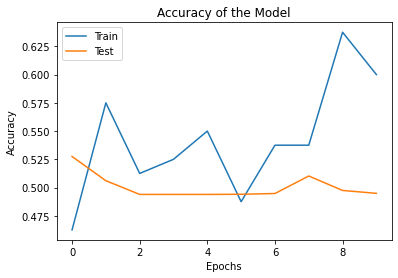

In [11]:
import matplotlib.pyplot as plt
plt.plot(fitted.history['acc'])
plt.plot(fitted.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of the Model")
plt.legend(["Train", "Test"])
plt.show()

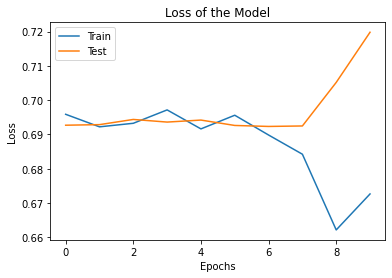

In [12]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of the Model")
plt.legend(["Train", "Test"])
plt.show()